# Home assignment 5

Please, rename the Jupyter Notebook that you will submit as ```Surname_assignment5.ipynb```, where instead of ```Surname``` you write your family name. A solution of every problem should be placed below of the corresponding problem statement.

After the running commands (Kernel -> Restart & Run All) all cells in your file have to run correctly. Please check this before submission.

## Problem 1 (4 pts)

- (2 pts) Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal

- (2 pts) Show that for the function $f(x) = x^{\top}x$ the steepest gradient descent converges after one iteration using direct computations

\# Your solution is here

(2 pts) Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal

First of all, let's state the steepest descent step:

$ \eta_k=arg\ min_{\eta \in R^+} f(x_{k+1}) = arg\ min\ f(x_k - \eta \nabla f(x_k))$

$ \Leftrightarrow $

$\eta_k=arg\ min_{\eta \in R^+} L(\eta)$, where $L(\eta)=f(x_k-\eta \nabla f(x_k))$
.

Thus, $\nabla_\eta L(\eta)=0$.

In other words:

$\frac{\partial L}{\partial \eta} = \frac{\partial L}{\partial x_{k+1}} \frac{x_{k+1}}{\partial \eta}$

Where $\frac{\partial L}{\partial x_{k+1}} = \nabla f(x_{k+1})$,

And $\frac{x_{k+1}}{\partial \eta} = \nabla f(x_{k})$

And, by definition, we have:

$\nabla f(x_{k+1})^T \nabla f(x_{k}) = 0$

Which definitely means that each two adjacent steps are ortogonal to each other.

Proven.

(2 pts) Show that for the function $ f(x)=x^⊤x $ the steepest gradient descent converges after one iteration using direct computations

$\nabla f(x) = 2x$

The steepest gradient descent problem:

$x_{k+1}=x_k - \eta_k \nabla f(x_k)$

and

$\eta_k=arg\ min_{\eta \in R^+} f(x_{k+1}) = arg\ min f(x_k-\eta \nabla f(x_k))$

We have:

$\nabla f(x_{k+1})^T \nabla f(x_{k}) = 0$

Thus,

$(2x_{k+1})^T(2x_k)=0$

$(2(x_k-2\eta_k x_k))^T(2x_k)=0$

$(2x_k-4\eta_k x_k)^T(2x_k)=0$

$(2x_k)^T (2x_k)-(4\eta_k x_k)^T(2x_k)=0$

$ 4 x_k^T x_k - 8\eta_k x_k^T x_k=0$

$ \eta_k=\frac{1}{2}$

And as $x_{k+1}=x_k - \eta_k \nabla f(x_k)$ then,

$x_{k+1}=x_k - \frac{1}{2} 2 x_k = 0$

Finally,

$\nabla f(x_{k+1}) = 2*0=0$

Which means, that we found an optimum in one iteration.

## Problem 2 (10 pts)

- (6 pts) Solve the foloowing problem with the steepest gradient descent method

$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

where 

$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$

and initial guess $x^0 = 0$ with tolerance of the gradient norm equal to $10^{-6}$. 

- (2 pts) Make convergence plot in terms of the decreasing of gradient norm and make a conclusion on the convergence speed 
- (2 pts) Find spectrum of the matrix $A$ with a proper ```numpy``` function and compare the derived convergence plot with theoretical upper bound. How is the theoretical upper bound tight?

\# Your solution is here

(6 pts) Solve the foloowing problem with the steepest gradient descent method

First of all, let's show, what we're trying to achieve. We're trying to find the point, where the gradient is equal to zero:

$\nabla f(x) = \nabla(\frac{1}{2}x^{\top}Ax - b^{\top}x)
 = \frac{1}{2}((A + A^\top) x - b) = 0$

A is the square symmetric matrix. Thus:

$Ax-b=0$

$Ax=b$

---

Also, let's find the step size.

$\nabla f(x_{k+1})^\top \nabla f(x_{k}) = 0$

$(Ax_{k+1}-b)^\top (Ax_{k}-b) = 0$

$(A(x_{k}-\eta (Ax_k-b))-b)^\top (Ax_{k}-b) = 0$

$(Ax_{k}-\eta A(Ax_k-b)-b)^\top (Ax_{k}-b) = 0$

$(Ax_{k}-\eta AAx_k-\eta Ab-b)^\top (Ax_{k}-b) = 0$

$(Ax_k)^\top Ax_k - \eta (AAx_k)^\top Ax_k + \eta (Ab)^\top Ax_k - b^\top Ax_k-(Ax_k)^\top b + \eta (AAx_k)^\top b -\eta(Ab)^\top b +b^\top b = 0$

$\eta ((AAx_k-Ab)Ax_k-(AAx_k-Ab)^\top b) = (Ax_k-b)^\top (Ax_k-b)$

$\eta = \frac{(Ax_k-b)^\top (Ax_k-b)}{(A(Ax_k-b))^\top (Ax_k-b)}$

$\eta = \frac{\nabla f(x_k)^\top \nabla f(x_k)}{\nabla f(x_k)^\top A \nabla f(x_k)}$

In [1]:
import numpy as np
from numpy import linalg
import plotly.express as px

def steepest_descent(A, b, x, tol=10**(-6)):
  r = b - A @ x
  k = 0
  xs = [x]
  xps, yps = [0], [linalg.norm(r)]  # for the plot
  while linalg.norm(r) > tol:
    p = r
    q = A @ p
    eta = (p @ r) / (p @ q)
    x = x + eta * p
    r = r - eta * q
    k += 1
    xs.append(x)
    xps.append(k)
    yps.append(linalg.norm(r))
  return x, xs, xps, yps

In [2]:
A = np.array([
              [0.78, -0.02, -0.12, -0.14],
              [-0.02, 0.86, -0.04, 0.06],
              [-0.12, -0.04, 0.72, -0.08],
              [-0.14, 0.06, -0.08, 0.74]
])
b = np.array([0.76, 0.08, 1.12, 0.68])
x0 = np.array([0, 0, 0, 0])

x, xs, xps, yps = steepest_descent(A, b, x0)
x

array([1.53496492, 0.12200972, 1.97515601, 1.4129552 ])

In [3]:
# (2 pts) Make convergence plot in terms of the decreasing of gradient norm 
# and make a conclusion on the convergence speed

fig = px.line(x=xps, y=yps, labels={'x':"Iterations", 'y':"Norm of x"})
fig.show()

Let's try to draw the convergence graph in log-scale.

In [4]:
fig = px.line(x=xps, y=yps, labels={'x':"Iterations", 'y':"Norm of x"}, log_y=True)
fig.show()

Well, it is linear in log-scale. Which, actually, means that the convergence speed is linear.

\# (2 pts) Find spectrum of the matrix  A  with a proper numpy function and compare the derived convergence plot with theoretical upper bound. How is the theoretical upper bound tight?

The condition number of the Hessian, being the ratio of the largest eigenvalue to the smallest, is the ratio of the steepest ridge's steepness to the shallowest ridge's steepness, which is why it enters into the convergence bounds.

Let's state that the Hessian is equal to the given matrix A.

In [5]:
# Since the Hessian of out matrix is equal to A, let's find the eigen values
eigv = sorted(np.linalg.eigvals(A))
eigv

[0.5200000000000006, 0.76, 0.88, 0.9399999999999996]

In [6]:
# The condition number
kappa = max(eigv) / min(eigv)
kappa

1.807692307692305

In [7]:
# We get that the steepest gradient descent for the quadratic function converges
# linearly with the factor
q = (kappa - 1)**2 / (kappa + 1)**2
q

0.08275473822480729

Let's compare it with the rate of convergence of our objective function using the following formula:

$\delta = \frac{f(x_{k+1})-f(x_*)}{f(x_{k})-f(x_*)}$

In [8]:
def f(A, b, x):
    return 1/2 * x.T @ A @ x - b.T @ x

ans = []
for i in range(1, len(xs)):
  delta = (f(A, b, xs[i]) - f(A, b, x)) / (f(A, b, xs[i-1]) - f(A, b, x))
  ans.append(delta)
ans

[0.008413667606037976,
 0.013829942914126042,
 0.06096981114881725,
 0.06502868219010749,
 0.06586548266906418,
 0.06593149275699148,
 0.06592535594768986,
 0.06567558792151769,
 0.06191586034795301,
 0.0]

As we can see, the $\delta$ for all of our iterations doesn't exceed the previously found $q$, which is our upper theoretical bound of the convergence rate for the given quadratic function.

## Problem 3 (16 pts)

- (1 pts) Consider the simple binary classification problem of data taken with [this utility](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). So the first step in this problem is downlowding the dataset and derive matrix $X \in \mathbb{R}^{m \times n}$ of given data and vector $y \in \mathbb{R}^m$ of labels. 
- Now to train the simple logistic regression model you need to solve the following optimization problem

$$ -\frac{1}{m} \sum_{i=1}^m (y_i \log(h(w, b | x_i)) + (1 - y_i)\log(1 - h(w, b | x_i))) \to \min_{w, b},$$

where $y_i$ is an $i$-th label, $x_i$ is an $i$-th row of the matrix $X$, $h(w, b | x_i) = \sigma(w^{\top}x_i + b)$ (here we use $x_i$ as a column vector) and $\sigma(z) = \frac{1}{1 + e^{-z}}$. This problem has two parameter $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$. It is possible to incorporate them in the single vector, so if you want, you can consider them as a components of the single vector.
    
The explanation of the form of the objective function and related topics on how to measure the quality of the trained model will be discussed in the machine learning course.

- (5 pts) Implement the gradient of this objective function and compare your implementation with automatically computed gradient in JAX. Loops are prohibited in your implementation!
- (5 pts) Consider four constant step sizes $10^{-3}, 10^{-2}, 10^{-1}, 1$ and compare the convergence of the gradient descent for them. Also fix the initialization in every run. You should get three convergence plots and analyze them.
- (3 pts) Compare the obtained results with the results if Armijo rule to adapt the step size is used. Provide convergence plots and running time in seconds in all experiments.
-  (2 pts) Make a conclusion on the gain that can be established by the proper adaptive step size selection rules 


In [9]:
# Your solution is here
# (1 pts) Consider the simple binary classification problem of data taken with 
# this utility. So the first step in this problem is downlowding the dataset 
# and derive matrix  X∈R^m×n  of given data and vector  y∈R^m  of labels.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from jax import grad as jax_grad
import jax.numpy as jnp
import matplotlib.pyplot as plt

data = load_breast_cancer()
y = data.target
X = data.data

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.hstack((X, np.ones((X.shape[0], 1))))
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (569, 31)
y shape: (569,)


In [10]:
# (5 pts) Implement the gradient of this objective function and compare your 
# implementation with automatically computed gradient in JAX. Loops are 
# prohibited in your implementation!

# a) JAX
w1 = 0.5 * jnp.ones(X.shape[1])  # bias b included

def jax_sigm(z):
  return 1 / (1 + jnp.exp(-z))

def jax_predict(X, w):
  return jax_sigm(jnp.dot(X, w))

def jax_cost(X, w, y, eps=1e-6):
  n = y.size
  p = jax_predict(X, w)
  # bound the probabilities within (0,1) to avoid ln(0):
  p = jnp.clip(p, eps, 1 - eps)
  return -jnp.sum(y * jnp.log(p) + (1 - y) * jnp.log(1 - p)) / n

In [11]:
def jax_train(X, w, y, tol=1e-3, n_iter=1000, alpha=1):
  w = np.copy(w)
  new_cost = float(jax_cost(X, w, y))
  cost_hist = [new_cost]
  for i in range(n_iter):
    w -= alpha * jax_grad(jax_cost, argnums=1)(X, w, y)
    new_cost = float(jax_cost(X, w, y))
    cost_hist.append(new_cost)
    if (i > 20) and (i % 10 == 0):
      if jnp.abs(cost_hist[-1] - cost_hist[-20]) < tol:
        print(f"Exited loop at iteration {i}")
        return cost_hist
  print(f"Exceeded max iteration: {n_iter}")
  return cost_hist

In [12]:
%%time
cost_hist = jax_train(X, w1, y, alpha=1)

Exited loop at iteration 170
CPU times: user 3.93 s, sys: 36.5 ms, total: 3.97 s
Wall time: 3.96 s


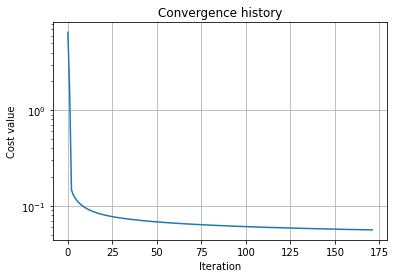

In [13]:
_, ax = plt.subplots()
plt.semilogy(cost_hist)
ax.grid()
_ = ax.set(xlabel="Iteration", ylabel="Cost value", title="Convergence history")

In [14]:
# b) My implementation

First of all, consider a so-called **logistic loss**. In the following calculation we will consider X being fixed:

$L(w_0,w_1)=-\frac{1}{m}\sum_{i=1}^{m}(y_i \cdot log(\sigma(w_o,w_1))+(1-y_i)  \cdot log(1-\sigma(w_o,w_1)))$

Where

$\sigma(w_0,w_1) = \frac{1}{1 + e^{-(w_0+w_1 x_i)}}$

Find the gradient of the loss function above.

$\triangledown L(w_0,w_1) = \left ( \frac{\partial L(w_0,w_1)}{\partial w_0}, \frac{\partial L(w_0,w_1)}{\partial w_1} \right )$

Let's find the sigma function partial derivatives.

$\sigma(z) = \frac{1}{1 + e^{-z}}$

$\frac{\partial}{\partial z} \sigma(z) = \frac{\partial}{\partial z}(1 + e^{-z})^{-1} = -(1+e^{-z})^{-2} \cdot (-e^{-z}) =
\\
= \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} \cdot \frac{e^{-z}}{1+e^{-z}} = \frac{1}{1+e^{-z}} \cdot \frac{1+e^{-z}-1}{1+e^{-z}} = 
\\
= \sigma(z) \cdot (1 - \sigma(z))$

$\frac{\partial}{\partial w_0}\sigma(w_0,w_1) = \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1)) \cdot \frac{\partial}{\partial w_0}(w_0+w_1 x_i)
\\
= \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1))$

$\frac{\partial}{\partial w_1}\sigma(w_0,w_1) = \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1))\cdot \frac{\partial}{\partial w_1}(w_0+w_1 x_i)
\\
=x_i \cdot \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1))$




Add -1/m !!!

Find the partial derivatives of the loss function for $w_0$:

$\frac{\partial}{\partial w_0}\sum_{i=1}^{m}(y_i \cdot log(\sigma(w_o,w_1)) = 
\\
=\sum_{i=1}^{m} y_i \cdot \frac{1}{\sigma(w_o,w_1)} \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1)) = 
\\
= \sum_{i=1}^{m} y_i \cdot (1-\sigma(w_0,w_1))$

And

$\frac{\partial}{\partial w_0} \sum_{i=1}^{m}(1-y_i) \cdot log(1-\sigma(w_o,w_1))) =
\\
= \frac{1}{m}\sum_{i=1}^{m}(1-y_i) \cdot \frac{1}{1-\sigma(w_o,w_1)} \cdot \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1)) =
\\
= \frac{1}{m}\sum_{i=1}^{m}(1-y_i) \cdot \sigma(w_0,w_1)$

$\frac{\partial L(w_0,w_1)}{\partial w_0} = 
-\frac{1}{m}\sum_{i=1}^{m} (y_i \cdot (1-\sigma(w_0,w_1)) - (1-y_i) \cdot \sigma(w_0,w_1)) =
\\
= -\frac{1}{m}\sum_{i=1}^{m} ( 
y_i - y_i \cdot \sigma(w_0,w_1) - \sigma(w_0,w_1) + y_i \cdot \sigma(w_0,w_1)
) =
\\
= -\frac{1}{m}\sum_{i=1}^{m}(y_i - \sigma(w_0,w_1))$

Find the partial derivatives of the loss function for $w_1$:

$\frac{\partial}{\partial w_1}\sum_{i=1}^{m}(y_i \cdot log(\sigma(w_o,w_1)) =
\\
= \sum_{i=1}^{m} \left( 
y_i \cdot \frac{1}{\sigma(w_o,w_1)} \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1)) \cdot x_i 
\right) = 
\\
= \sum_{i=1}^{m} x_i \cdot y_i \cdot (1-\sigma(w_0,w_1))$

And

$\frac{\partial}{\partial w_1} \sum_{i=1}^{m}(1-y_i) \cdot log(1-\sigma(w_o,w_1))) =
\\
= -\sum_{i=1}^{m}(1-y_i) \cdot \frac{1}{1-\sigma(w_o,w_1)} \cdot \sigma(w_0,w_1) \cdot (1-\sigma(w_0,w_1) \cdot x_i) =
\\
= -\sum_{i=1}^{m}x_i \cdot (1-y_i) \cdot \sigma(w_0,w_1)$

$\frac{\partial L(w_0,w_1)}{\partial w_1} = 
-\frac{1}{m}\sum_{i=1}^{m} x_i \cdot (y_i \cdot (1-\sigma(w_0,w_1)) - (1-y_i) \cdot \sigma(w_0,w_1)) =
\\
= -\frac{1}{m}\sum_{i=1}^{m} x_i \cdot ( 
y_i - y_i \cdot \sigma(w_0,w_1) - \sigma(w_0,w_1) + y_i \cdot \sigma(w_0,w_1)
) =
\\
= -\frac{1}{m}\sum_{i=1}^{m}x_i(y_i - \sigma(w_0,w_1))$

So, the final gradient is:

$\frac{\partial L(w_0,w_1)}{\partial w_0} =-\frac{1}{m} \sum_{i=1}^{m}(y_i - \sigma(w_0,w_1))$

$\frac{\partial L(w_0,w_1)}{\partial w_1} =-\frac{1}{m} \sum_{i=1}^{m}x_i(y_i - \sigma(w_0,w_1))$

In [15]:
# implementation
w1 = 0.5 * np.ones(X.shape[1])  # bias b included

def sigm(z):
  return 1 / (1 + np.exp(-z))

def predict(X, w):
  return sigm(np.dot(X, w))

def cost(X, w, y, eps=1e-6):
  n = y.size
  p = predict(X, w)
  # bound the probabilities within (0,1) to avoid ln(0):
  p = np.clip(p, eps, 1 - eps)
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / n

def grad(X, w, y):
  m = X.shape[0]
  diff = y - sigm(np.dot(X, w))
  i_comp = np.tile(diff, (X.shape[1], 1)).T * X
  return -1/m * np.sum(i_comp, axis=0)

In [16]:
def train(X, w, y, tol=1e-3, n_iter=1000, alpha=1):
  w = np.copy(w)
  new_cost = float(cost(X, w, y))
  cost_hist = [new_cost]
  for i in range(n_iter):
    w -= alpha * grad(X, w, y)
    new_cost = float(cost(X, w, y))
    cost_hist.append(new_cost)
    if (i > 20) and (i % 10 == 0):
      if np.abs(cost_hist[-1] - cost_hist[-20]) < tol:
        print(f"Exited loop at iteration {i}")
        return cost_hist
  print(f"Exceeded max iteration: {n_iter}")
  return cost_hist

In [17]:
%%time
cost_hist = train(X, w1, y, alpha=1)

Exited loop at iteration 170
CPU times: user 76.5 ms, sys: 65 ms, total: 142 ms
Wall time: 85.3 ms


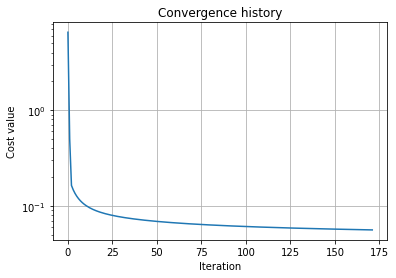

In [18]:
_, ax = plt.subplots()
plt.semilogy(cost_hist)
ax.grid()
_ = ax.set(xlabel="Iteration", ylabel="Cost value", title="Convergence history")

In [19]:
# (5 pts) Consider four constant step sizes  10^−3,10^−2,10^−1,1  and compare 
# the convergence of the gradient descent for them. Also fix the initialization 
# in every run. You should get three convergence plots and analyze them.

# JAX
%%time
res = list()
for i in range(4):
  res.append(jax_train(X, w1, y, alpha=10**(-i), tol=10e-6, n_iter=1000))

Exceeded max iteration: 1000
Exceeded max iteration: 1000
Exceeded max iteration: 1000
Exceeded max iteration: 1000
CPU times: user 49.3 s, sys: 210 ms, total: 49.5 s
Wall time: 49.4 s


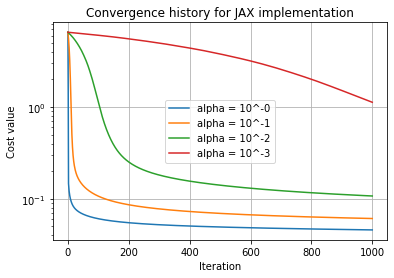

In [20]:
_, ax = plt.subplots()
for i, hist in enumerate(res):
  plt.semilogy(hist, label = f"alpha = 10^-{i}")
plt.legend()
ax.grid()
_ = ax.set(xlabel="Iteration", ylabel="Cost value", 
           title="Convergence history for JAX implementation")

In [21]:
# Self-implemented
%%time
res = list()
for i in range(4):
  res.append(train(X, w1, y, alpha=10**(-i), tol=10e-6, n_iter=1000))

Exceeded max iteration: 1000
Exceeded max iteration: 1000
Exceeded max iteration: 1000
Exceeded max iteration: 1000
CPU times: user 1.65 s, sys: 1.3 s, total: 2.95 s
Wall time: 1.56 s


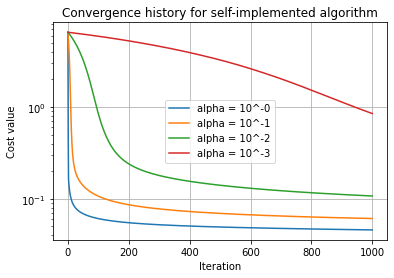

In [22]:
_, ax = plt.subplots()
for i, hist in enumerate(res):
  plt.semilogy(hist, label=f"alpha = 10^-{i}")
plt.legend()
ax.grid()
_ = ax.set(xlabel="Iteration", ylabel="Cost value", 
           title="Convergence history for self-implemented algorithm")

Let's compare JAX and manual implementation for 4 runs with different alpha:
1. JAX time: 49.3 s
2. Self-implemented: 2.97 s

Convergence rates are approximately equal.

In [23]:
# (3 pts) Compare the obtained results with the results if Armijo rule to adapt
# the step size is used. Provide convergence plots and running time in seconds
# in all experiments.

def train_armijo(X, w, y, tol=1e-3, n_iter=1000, alpha=1, beta=0.5):
  w = np.copy(w)
  t = 1
  new_cost = float(cost(X, w, y))
  cost_hist = [new_cost]
  for i in range(n_iter):
    while cost(X, w-alpha*t*grad(X, w, y), y) > cost(X, w, y) + alpha*t*np.dot(grad(X, w, y),grad(X, w, y)):
      print(f"Iteration {i} - Armijo rule applied")
      t *= beta
    w -= alpha * t * grad(X, w, y)
    new_cost = float(cost(X, w, y))
    cost_hist.append(new_cost)
    if (i > 20) and (i % 10 == 0):
      if np.abs(cost_hist[-1] - cost_hist[-20]) < tol:
        print(f"Exited loop at iteration {i}")
        return cost_hist
  print(f"Exceeded max iteration: {n_iter}")
  return cost_hist

I will use alpha = 1000, because this value gives the most descriptive application of Armijo rule for the given data.

In [24]:
%%time
cost_hist = train(X, w1, y, tol=1e-6, n_iter=5000, alpha=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in exp



Exceeded max iteration: 5000
CPU times: user 2.34 s, sys: 1.85 s, total: 4.2 s
Wall time: 2.22 s


In [25]:
%%time
cost_hist_armijo = train_armijo(X, w1, y, tol=1e-6, n_iter=5000, alpha=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in exp



Iteration 320 - Armijo rule applied
Iteration 320 - Armijo rule applied
Iteration 340 - Armijo rule applied
Iteration 342 - Armijo rule applied
Iteration 530 - Armijo rule applied
Iteration 3456 - Armijo rule applied
Iteration 3457 - Armijo rule applied
Exceeded max iteration: 5000
CPU times: user 7.33 s, sys: 5.76 s, total: 13.1 s
Wall time: 6.75 s


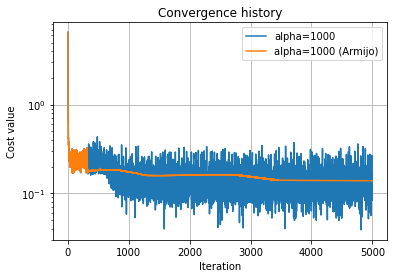

In [26]:
_, ax = plt.subplots()
plt.semilogy(cost_hist, label="alpha=1000")
plt.semilogy(cost_hist_armijo, label="alpha=1000 (Armijo)")
plt.legend()
ax.grid()
_ = ax.set(xlabel="Iteration", ylabel="Cost value", title="Convergence history")

In [27]:
"""
a) Accuracy

After applying the Armijo rule, the algorithm keeps closer to the optimum 
compared to the algorithm with the fixed convergence rate, which bounces from 
one direction to another, failing to converge. This situation can be 
characterized the following way:
fixed step size doesn't provide the necessary precision, as the adaptive 
convergence rate do.

b) Running time

2.1 s vs 13.3 s, which is logically. The Armijo-based gradient descent has lower 
convergence rate starting from some point and also there are additional 
computations.
"""

"\na) Accuracy\n\nAfter applying the Armijo rule, the algorithm keeps closer to the optimum \ncompared to the algorithm with the fixed convergence rate, which bounces from \none direction to another, failing to converge. This situation can be \ncharacterized the following way:\nfixed step size doesn't provide the necessary precision, as the adaptive \nconvergence rate do.\n\nb) Running time\n\n2.1 s vs 13.3 s, which is logically. The Armijo-based gradient descent has lower \nconvergence rate starting from some point and also there are additional \ncomputations.\n"

In [28]:
# (2 pts) Make a conclusion on the gain that can be established by the proper 
# adaptive step size selection rules

"""
There are, mostly speaknig, 3 conclusions:

- For the fixed step size:
1. Large step size gives us a higher rate of convergence, but low accuracy
2. On the other hand, low convergence rate is accurate, but takes significantly
more time to converge.

- For the adaptive step size:
3. Having the adaptive step size gives us the best of both worlds: the algorithm 
converges rapidly at the beginning and starts to slow down closer to the oprimum
in order to give a more precise result.
"""

'\nThere are, mostly speaknig, 3 conclusions:\n\n- For the fixed step size:\n1. Large step size gives us a higher rate of convergence, but low accuracy\n2. On the other hand, low convergence rate is accurate, but takes significantly\nmore time to converge.\n\n- For the adaptive step size:\n3. Having the adaptive step size gives us the best of both worlds: the algorithm \nconverges rapidly at the beginning and starts to slow down closer to the oprimum\nin order to give a more precise result.\n'